In [1]:
from dora.api import DataExplorer

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

explorer = DataExplorer()

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Cluster Products with no asins
pcluster=explorer.products.clusterProducts(n_clusters=3)
pcluster.head()

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item

,productid,asin,y_pred
0,10001,0000000116,0
1,10002,0000000868,0
2,10003,0000013714,0
3,10004,0000015393,0
4,10005,0000029831,0


In [3]:
#Cluster Products with asins
pclusterasin=explorer.products.clusterProducts(n_clusters=2,asin=['0000000868','0000029831'])
pclusterasin.head()

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a cop

,productid,asin,y_pred
0,10001,0000000116,1
2,10003,0000013714,0
3,10004,0000015393,0
5,10006,0000038504,0
6,10007,0000041696,0


In [103]:
response = explorer.products.clusterQuery()

In [104]:
response.results

[(10001, '0000000116', 512, Decimal('2.5000000000000000'), '1', 629.0),
 (10002, '0000000868', 230, Decimal('4.0000000000000000'), '173508', 277.0),
 (10003, '0000013714', 2408, Decimal('4.2857142857142857'), '266162', 118.0),
 (10004, '0000015393', 34, Decimal('4.0000000000000000'), '720870', 445.0),
 (10005,
  '0000029831',
  8480,
  Decimal('4.8000000000000000'),
  '3564986011',
  1501.0),
 (10006, '0000038504', 3048, Decimal('4.5000000000000000'), '882340', 685.0),
 (10007, '0000041696', 10184, Decimal('4.2500000000000000'), '1007', 322.0),
 (10008, '0000095699', 1290, Decimal('3.0000000000000000'), '1002', 323.0),
 (10009,
  '0000174076',
  49,
  Decimal('5.0000000000000000'),
  '4539344011',
  1028.0),
 (10010, '0000202010', 668, Decimal('5.0000000000000000'), '266160', 1754.0),
 (10011, '0000230022', 80, Decimal('5.0000000000000000'), '1005', 463.0),
 (10012, '0000401048', 87, Decimal('5.0000000000000000'), '872404', 2443.0),
 (10013,
  '0000477141',
  18,
  Decimal('1.000000000

In [105]:
data=pd.DataFrame(response.results)

In [106]:
data.columns=response.columns

In [107]:
data.columns

Index(['productid', 'asin', 'num_orders', 'avgrating', 'category',
       'days_on_sale'],
      dtype='object')

In [108]:
X=data[['num_orders','avgrating','category','days_on_sale']].values

In [109]:
X=StandardScaler().fit_transform(X)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [139]:
algorithm=KMeans(n_clusters=4, algorithm='auto',init='k-means++')
algorithm.fit_predict(X)
y_pred=algorithm.labels_

In [140]:
prodid=data[['productid']]

In [141]:
prodid['y_pred']=y_pred

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [145]:
prodid.loc[prodid['y_pred']==2]

,productid,y_pred
17,10018,2
203,10204,2
833,10834,2
1176,11177,2
2129,12137,2
2169,12177,2
2800,12820,2
2806,12826,2
3221,13251,2
3268,13298,2


In [30]:
asin=set(['0000000116', '0000000868'])

In [31]:
data[data['asin'].isin(asin)]

,productid,asin,num_orders,avgrating,category,days_on_sale
0,10001,0000000116,512,2.5000000000000000,1,629.0
1,10002,0000000868,230,4.0000000000000000,173508,277.0


In [34]:
input_centers=data[data['asin'].isin(asin)]
input_centers=input_centers[['num_orders','avgrating','category','days_on_sale']].values

In [37]:
X2=data[~data['asin'].isin(asin)]
X2=X2[['num_orders','avgrating','category','days_on_sale']].values

In [40]:
X2=StandardScaler().fit_transform(X2)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [88]:
algorithm2=KMeans(n_clusters=2, algorithm='auto',init=input_centers)
algorithm2.fit_predict(X)
y_pred2=algorithm.labels_

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [60]:
# 3D Plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [130]:
fig = pyplot.figure()
ax = Axes3D(fig)
colors = ['green','red','blue']

In [131]:
centers = algorithm2.cluster_centers_
center_colors = colors[:len(centers)]

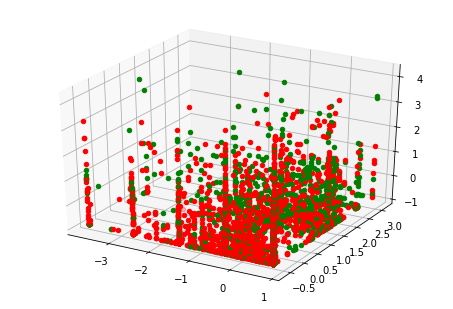

In [132]:
ax.scatter(centers[:, 1], centers[:, 2],centers[:,3],c=center_colors)
for i in range(len(X2)):
    ax.scatter(X2[i][1], X2[i][2],X2[i][3], c=colors[y_pred2[i]])
pyplot.show()

In [94]:
fig2 = pyplot.figure()
ax2 = Axes3D(fig)

In [95]:
centers2 = algorithm2.cluster_centers_
center_colors2 = colors[:len(centers2)]

In [96]:
ax2.scatter(centers2[:, 0], centers2[:, 2],centers2[:,3],c=center_colors2)
for i in range(len(X2)):
    ax2.scatter(X2[i][0], X2[i][2],X2[i][3], c=colors[y_pred2[i]])
pyplot.show()

In [147]:
#Test Customer Clustering

In [4]:
response = explorer.products.clusterQueryCustomers()

In [5]:
data=pd.DataFrame(response.results, columns=response.columns)

In [6]:
data

,numorders,gender,zipcode,householdid,firstname,totalspent
0,412,M,10036,19885296,MIKE,$606.25
1,189,F,10036,19885296,HILDA,$651.59
2,99,M,10036,49927024,MIKE,$0.00
3,99,,10036,19885296,,"$2,226.32"
4,70,M,10036,49927024,JIM,$0.00
5,28,,11354,22269801,PO-WEN,"$1,218.96"
6,26,F,10168,36201520,NANCY,$0.00
7,24,M,10036,19440306,PETER,$814.56
8,21,,11590,36209331,,"$3,312.75"
9,21,,35201,75467926,,$364.00


In [7]:
mask = (data['zipcode'].str.len()>=5) & (data['zipcode'].str.len()<7) & (data['zipcode'].str.isnumeric())
data = data.loc[mask]
print(data)

        numorders gender zipcode  householdid  firstname totalspent
0             412      M   10036     19885296       MIKE    $606.25
1             189      F   10036     19885296      HILDA    $651.59
2              99      M   10036     49927024       MIKE      $0.00
3              99          10036     19885296             $2,226.32
4              70      M   10036     49927024        JIM      $0.00
5              28          11354     22269801     PO-WEN  $1,218.96
6              26      F   10168     36201520      NANCY      $0.00
7              24      M   10036     19440306      PETER    $814.56
8              21          11590     36209331             $3,312.75
9              21          35201     75467926               $364.00
10             17      M   44122     19626230     JEROME  $3,757.26
11             16      M   11230     20656767        ELI    $520.74
12             16      M   61021     19535255     EDWARD  $2,053.18
13             16      M   11375     18474444   

In [8]:
data['zipcode']=data['zipcode'].apply(pd.to_numeric)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
data.loc[data.gender=='F','gender']=1
data.loc[data.gender=='M','gender']=0
data.loc[data.gender=='','gender']=2

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
X=data[['numorders', 'gender', 'zipcode', 'totalspent']].values

In [12]:
for i in range(len(X)):
    X[i][3]=X[i][3].replace(",", "")
    X[i][3]=float(X[i][3].strip('$'))

In [15]:
X=StandardScaler().fit_transform(X)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
algorithm=KMeans(n_clusters=10, algorithm='auto', init='k-means++')
algorithm.fit_predict(X)
y_pred=algorithm.labels_

In [82]:
fig = pyplot.figure()
ax = Axes3D(fig)
colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
centers = algorithm.cluster_centers_
center_colors = colors[:len(centers)]

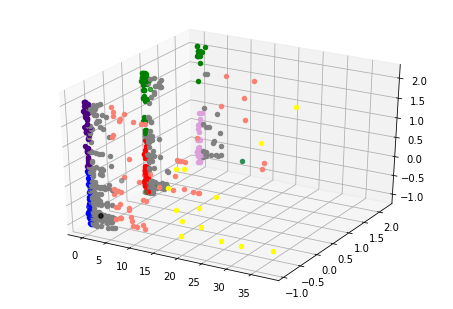

In [83]:
ax.scatter(centers[:, 3], centers[:, 1],centers[:,2],c=center_colors)
for i in range(1000):
    ax.scatter(X[i][3], X[i][1],X[i][2], c=colors[y_pred[i]])
pyplot.show()

In [1]:
from dora.api import DataExplorer

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

explorer = DataExplorer()

In [2]:
cCluster=explorer.customers.clusterCustomers(n_clusters=10)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/laurawilke/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item

In [3]:
cCluster

,householdid,gender,y_pred
0,19885296,0,3
1,19885296,1,9
2,49927024,0,9
3,19885296,2,9
4,49927024,0,9
5,22269801,2,7
6,36201520,1,7
7,19440306,0,7
8,36209331,2,6
9,75467926,2,7
